Endpoints of the line: (-1.0, -0.9839999999999989), (1.0, 0.9839999999999989)
Vector: [-2.46  2.5 ]
Total Mistakes: 22


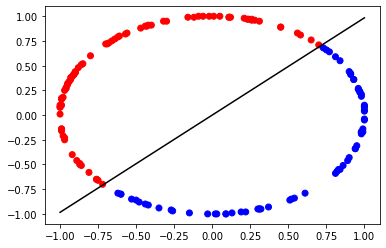

In [1]:
import numpy as np

# Set the data
import matplotlib.pyplot as plt
data_file = open("two_circle.txt", "r")
data = []
for line in data_file:
    curr_line = line.split()
    data.append([float(curr_line[0]), float(curr_line[1]), int(curr_line[2])])
data_file.close()
data = np.array(data)

def perceptron(points, labels, learning_rate=1.0, iterations=1000):
    # get num of points samples and num of points coordinates (features)
    n_samples, n_features = points.shape
    # init parameters
    weights = np.zeros(n_features)
    mistakes = 0
    # round the labels (e.g in case of float)
    true_labels = np.array([1 if i > 0 else 0 for i in labels])
    # iterate n_iters times
    for iterarion in range(iterations):
        found_mistakes = False
        # iterate over all the points
        for idx, point in enumerate(points):
            # if Wt * Xi > 0, guess + (the point in the positive side of the plane)
            #           else, guess - (the point in the negative side of the plane)
            linear_output = np.dot(point, weights)
            predicted_label = np.where(linear_output>0, 1, 0)
            # Handle mistake:
            #    if predicted x is - (0) but x is really + (1): 
            #        Wt+1 = Wt + Xi -> update = (true_labels[idx] - predicted_label =  1 - 0 = 1)
            #    if predicted x is + (1) but x is really - (0):
            #        Wt+1 = Wt - Xi -> update = (true_labels[idx] - predicted_label =  0 - 1 = -1)
            #    else, (true_labels[idx] - predicted_label) = 0 and no update will occur
            update = learning_rate * (true_labels[idx] - predicted_label)
            weights += update * point
            # if found mistake exit round t
            if update != 0:
                mistakes += 1
                found_mistakes = True
                break
        if not found_mistakes:
            break
    return weights, mistakes

if __name__ == "__main__":
    # split data into points and labels
    points, labels = data[:, :-1], data[:, -1]
    # get perceptron result
    weights, mistakes = perceptron(points, labels, learning_rate=1, iterations=100)
    # init figure to plot
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    # plot only the points (1 red, -1 blue)
    colors = ["red" if i == 1 else "blue" for i in labels]
    plt.scatter(points[:, 0], points[:, 1], marker="o", c=colors)
    # get min and max of the first axis (x)
    xmin = np.amin(points[:, 0])
    xmax = np.amax(points[:, 0])
    # convert the vector to line
    lineymin = (-weights[0] * xmin) / weights[1]
    lineymax = (-weights[0] * xmax) / weights[1]
    # plot the line
    print("Endpoints of the line: (" + str(xmin) + ", " + str(lineymin) + "), (" + str(xmax) + ", " + str(lineymax) + ")")
    ax.plot([xmin, xmax], [lineymin, lineymax], "k")
    # get min and max of the second axis (y)
    ymin = np.amin(points[:, 1])
    ymax = np.amax(points[:, 1])
    ax.set_ylim([ymin - 0.1, ymax + 0.1])
    print("Vector: " + str(weights))
    print("Total Mistakes: " + str(mistakes))
    plt.show()